<a href="https://colab.research.google.com/github/pakpak123/project_machineLearning/blob/main/rain_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

สมาชิกกลุ่ม
*   63010524 นางสาวนิชาภา พักเง้า
*   63010666 นางสาวพัณณ์ชิตา วรต่าย






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_roc_curve
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
data = pd.read_csv("/content/weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


ดูประเภทของข้อมูล

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#drop column ที่ไม่ใช้ในการ predict
data.drop('Date', inplace=True, axis=1)
data.drop('Evaporation', inplace=True, axis=1)
data.drop('Rainfall', inplace=True, axis=1)
data.drop('Sunshine', inplace=True, axis=1)
data.drop('WindGustDir', inplace=True, axis=1)
data.drop('RainTomorrow', inplace=True, axis=1)
data.drop('WindGustSpeed', inplace=True, axis=1)
data.drop('WindDir3pm', inplace=True, axis=1)
data.drop('WindDir9am', inplace=True, axis=1)
data.drop('Cloud9am', inplace=True, axis=1)
data.drop('Cloud3pm', inplace=True, axis=1)

In [ ]:
data

,Location,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,Albury,7.4,25.1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,Albury,12.9,25.7,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,Albury,9.2,28.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,Albury,17.5,32.3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No
145456,Uluru,3.6,25.3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No
145457,Uluru,5.4,26.9,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No
145458,Uluru,7.8,27.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No


In [ ]:
data.isna().sum()

Location            0
MinTemp          1485
MaxTemp          1261
WindSpeed9am     1767
WindSpeed3pm     3062
Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
Temp9am          1767
Temp3pm          3609
RainToday        3261
dtype: int64

ตรวจสอบข้อมูลที่เป็น Numerical Features (ตัวเลข)

In [ ]:
#เก็บค่า columns ที่เป็น numerical feature ไว้ในตัวแปร numerical_features
numerical_features = [column_name for column_name in data if data[column_name].dtype != 'O']
print("Name of Numerical Features : ",numerical_features)

Name of Numerical Features :  ['MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [ ]:
#เติมค่าว่างด้วยค่า mean
for column_name in numerical_features :
    data[column_name].fillna(data[column_name].mean(), inplace=True)
data

,Location,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.900000,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,Albury,7.4,25.100000,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,Albury,12.9,25.700000,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,Albury,9.2,28.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,Albury,17.5,32.300000,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No
145456,Uluru,3.6,25.300000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No
145457,Uluru,5.4,26.900000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No
145458,Uluru,7.8,27.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No


Checking for outliner in Numerical feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

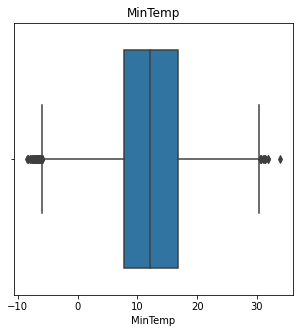

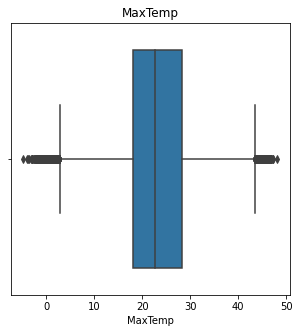

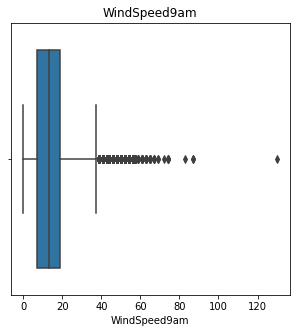

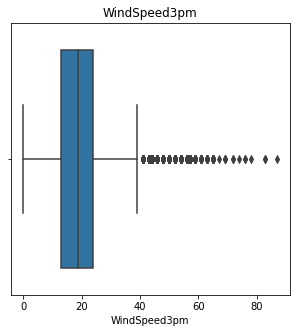

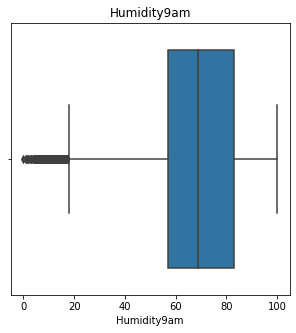

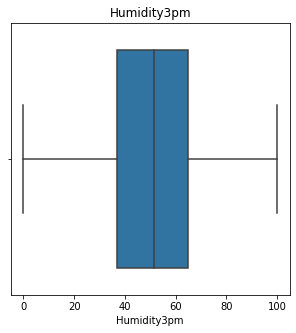

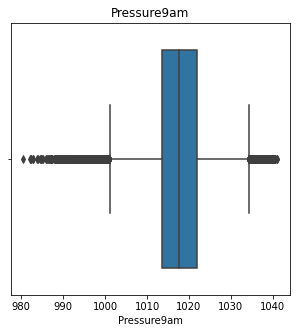

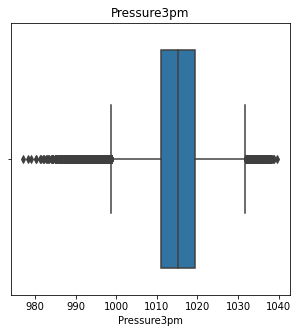

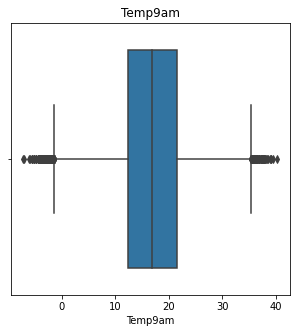

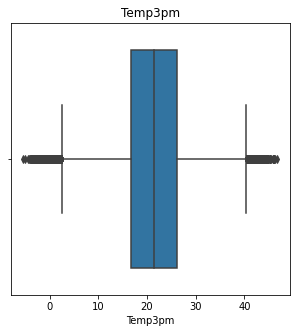

In [ ]:
#checking for outliner using Box plot
for feature in numerical_features :
    plt.figure(figsize=(5,5))
    sns.boxplot(data[feature])
    plt.title(feature)

Remove outliner from numerical features

In [ ]:
#features which has outliners
feature_has_outliner = ['MinTemp', 'MaxTemp' , 'WindSpeed9am', 'WindSpeed3pm' , 'Humidity9am', 'Pressure3pm' , 'Pressure9am', 'Temp3pm' , 'Temp9am']

In [ ]:
#replacing outliner using IQR
for feature in feature_has_outliner :
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1 #ค่าพิสัยระหว่างควอไทล์ (interquartile range)
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature] < lower_limit, feature] = lower_limit
    data.loc[data[feature] > upper_limit, feature] = upper_limit

ตรวจสอบ outliner อีกครั้ง

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

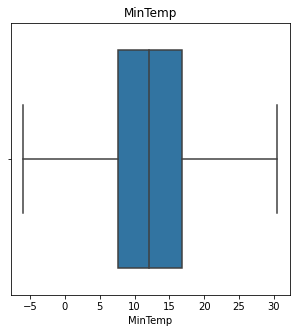

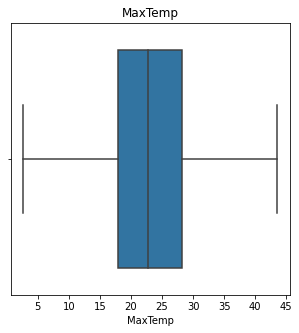

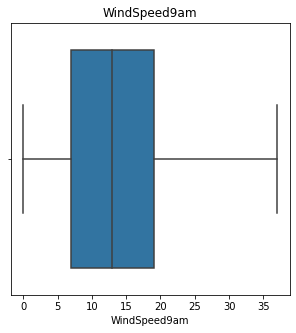

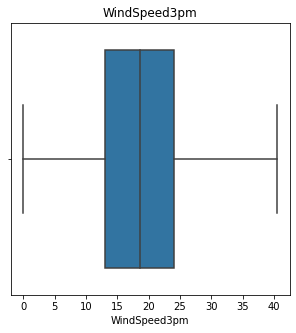

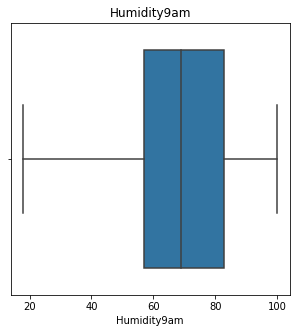

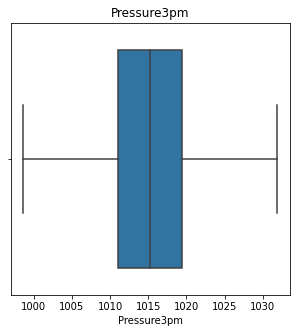

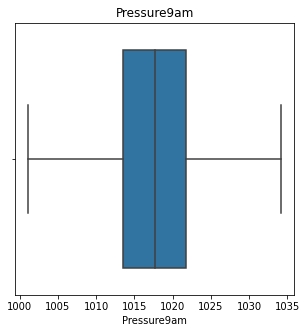

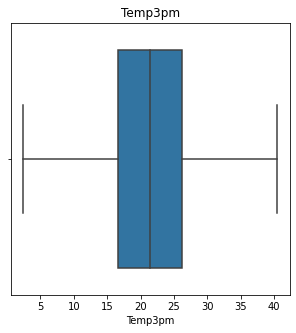

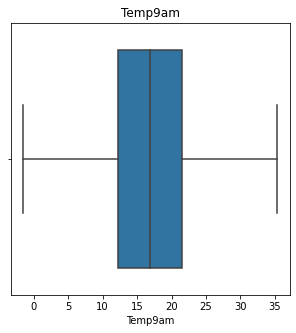

In [ ]:
#checking again to see if there is still has outliners in each numerical features
for feature in feature_has_outliner :
    plt.figure(figsize=(5,5))
    sns.boxplot(data[feature])
    plt.title(feature)

In [ ]:
data

,Location,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.900000,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,Albury,7.4,25.100000,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,Albury,12.9,25.700000,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,Albury,9.2,28.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,Albury,17.5,32.300000,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No
145456,Uluru,3.6,25.300000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No
145457,Uluru,5.4,26.900000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No
145458,Uluru,7.8,27.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No


In [ ]:
categorical_features = [column_name for column_name in data if data[column_name].dtype == 'O']
print("Name of Categorical Features : ",categorical_features)

Name of Categorical Features :  ['Location', 'RainToday']


In [ ]:
for each_uni in categorical_features :
    print('Number of unique values of {} are : {}'.format(each_uni, len(data[each_uni].unique())))

Number of unique values of Location are : 49
Number of unique values of RainToday are : 3


In [ ]:
data.isna().sum()

Location           0
MinTemp            0
MaxTemp            0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday       3261
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

Location        0
MinTemp         0
MaxTemp         0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
dtype: int64

In [ ]:
data.describe()

,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,142199.000000,142199.000000,142199.000000,142199.000000,142199.000000,142199.000000,142199.000000,142199.000000,142199.000000,142199.000000
mean,12.186892,23.232929,13.911043,18.550303,68.900504,51.482331,1017.679578,1015.275354,16.987903,21.691060
std,6.392175,7.086091,8.562741,8.445639,18.794616,20.539179,6.586574,6.544083,6.472932,6.834896
min,-5.950000,2.700000,0.000000,0.000000,18.000000,0.000000,1001.050000,998.650000,-1.500000,2.450000
25%,7.600000,17.900000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000
50%,12.000000,22.700000,13.000000,18.662657,70.000000,51.539116,1017.649940,1015.255889,16.800000,21.300000
75%,16.800000,28.200000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000
max,30.450000,43.500000,37.000000,40.500000,100.000000,100.000000,1034.250000,1031.850000,35.300000,40.450000


In [ ]:
#เปลี่ยนค่า Yes -> 1 และ No -> 0 ใน columns RainToday
data.replace({'RainToday' : {'Yes' : 1 , 'No' : 0}}, inplace=True)

In [ ]:
data

,Location,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.900000,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,Albury,7.4,25.100000,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,Albury,12.9,25.700000,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,Albury,9.2,28.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,Albury,17.5,32.300000,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
145456,Uluru,3.6,25.300000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0
145457,Uluru,5.4,26.900000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0
145458,Uluru,7.8,27.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0


In [ ]:
df_rain_con = pd.DataFrame()
df_rain_cat = pd.DataFrame()
for i in data:
    if data[i].dtypes != 'object':
        df_rain_con[i] = data[i]
    else:
        df_rain_cat[i] = data[i]

In [ ]:
df_rain_con

,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.900000,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.100000,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.700000,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.300000,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
145456,3.6,25.300000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0
145457,5.4,26.900000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0
145458,7.8,27.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0


In [ ]:
df_rain_cat

,Location
0,Albury
1,Albury
2,Albury
3,Albury
4,Albury
...,...
145455,Uluru
145456,Uluru
145457,Uluru
145458,Uluru


In [ ]:
list_column_df_rain_con = []
for i in df_rain_con.columns:
    list_column_df_rain_con.append(i)
list_column_df_rain_cat = []
for i in df_rain_cat.columns:
    list_column_df_rain_cat.append(i)

In [ ]:
scale = preprocessing.StandardScaler()
df_rain_con = pd.DataFrame(scale.fit_transform(df_rain_con.values), columns=list_column_df_rain_con, index=df_rain_con.index)
df_rain_con

,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.189781,-0.046984,0.711102,0.645270,0.111708,-1.435424,-1.515145,-1.249279,-0.013580,0.015939,-0.537569
1,-0.748870,0.263485,-1.157466,0.408460,-1.324879,-1.289361,-1.074854,-1.142311,0.032767,0.381710,-0.537569
2,0.111560,0.348158,0.594316,0.882079,-1.644120,-1.045923,-1.530327,-1.004782,0.619829,0.220771,-0.537569
3,-0.467275,0.672739,-0.339967,-1.130801,-1.271672,-1.727550,-0.012082,-0.378260,0.171808,0.703589,-0.537569
4,0.831192,1.279563,-0.807109,0.171651,0.696984,-0.899861,-1.044489,-1.417370,0.125461,1.171776,-0.537569
...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.468502,0.023577,-0.106397,-0.893992,-0.952431,-1.338049,1.050690,0.767818,-1.064112,0.103724,-0.537569
145456,-1.343349,0.291709,-0.106397,-1.130801,-0.686396,-1.484112,0.883683,0.584446,-0.940520,0.410972,-0.537569
145457,-1.061754,0.517504,-0.573538,-1.130801,-0.846017,-1.338049,0.504122,0.232982,-0.693336,0.645066,-0.537569
145458,-0.686293,0.531617,-0.106397,-1.367610,-0.952431,-1.338049,0.261202,0.187139,-0.291662,0.630435,-0.537569


In [ ]:
dataCorr = df_rain_con.corr()
dataCorr

,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
MinTemp,1.000000,0.734227,0.178225,0.177826,-0.231749,0.005775,-0.433225,-0.441559,0.898957,0.699817,0.055775
MaxTemp,0.734227,1.000000,0.016812,0.053797,-0.499133,-0.499464,-0.319130,-0.406609,0.881270,0.969617,-0.228570
WindSpeed9am,0.178225,0.016812,1.000000,0.508538,-0.273775,-0.032662,-0.213323,-0.163838,0.132082,0.006853,0.102202
WindSpeed3pm,0.177826,0.053797,0.508538,1.000000,-0.147255,0.015160,-0.275346,-0.237202,0.166854,0.031861,0.078528
Humidity9am,-0.231749,-0.499133,-0.273775,-0.147255,1.000000,0.660093,0.133919,0.178498,-0.469381,-0.491191,0.352743
Humidity3pm,0.005775,-0.499464,-0.032662,0.015160,0.660093,1.000000,-0.024313,0.050749,-0.217395,-0.555397,0.373586
Pressure9am,-0.433225,-0.319130,-0.213323,-0.275346,0.133919,-0.024313,1.000000,0.960243,-0.407308,-0.276241,-0.176801
Pressure3pm,-0.441559,-0.406609,-0.163838,-0.237202,0.178498,0.050749,0.960243,1.000000,-0.450460,-0.370572,-0.098094
Temp9am,0.898957,0.881270,0.132082,0.166854,-0.469381,-0.217395,-0.407308,-0.450460,1.000000,0.847471,-0.096294
Temp3pm,0.699817,0.969617,0.006853,0.031861,-0.491191,-0.555397,-0.276241,-0.370572,0.847471,1.000000,-0.232692


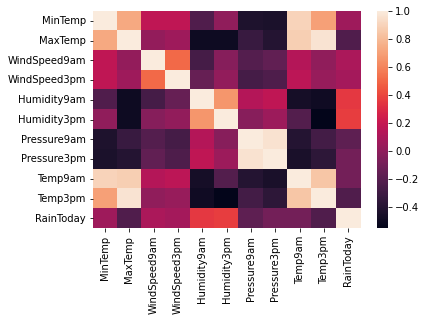

In [ ]:
sns.heatmap(dataCorr)

In [ ]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,MinTemp,MaxTemp,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.734227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.178225,0.016812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.177826,0.053797,0.508538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.231749,-0.499133,-0.273775,-0.147255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.005775,-0.499464,-0.032662,0.015160,0.660093,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.433225,-0.319130,-0.213323,-0.275346,0.133919,-0.024313,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.441559,-0.406609,-0.163838,-0.237202,0.178498,0.050749,0.960243,0.000000,0.000000,0.000000,0.0
8,0.898957,0.881270,0.132082,0.166854,-0.469381,-0.217395,-0.407308,-0.450460,0.000000,0.000000,0.0
9,0.699817,0.969617,0.006853,0.031861,-0.491191,-0.555397,-0.276241,-0.370572,0.847471,0.000000,0.0


In [ ]:
to_drop = [column for column in lower if any(lower[column] > 0.86)]
df_rain_con.drop(to_drop, inplace=True, axis=1)
df_rain_con

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.711102,0.645270,0.111708,-1.435424,-1.249279,-0.013580,0.015939,-0.537569
1,-1.157466,0.408460,-1.324879,-1.289361,-1.142311,0.032767,0.381710,-0.537569
2,0.594316,0.882079,-1.644120,-1.045923,-1.004782,0.619829,0.220771,-0.537569
3,-0.339967,-1.130801,-1.271672,-1.727550,-0.378260,0.171808,0.703589,-0.537569
4,-0.807109,0.171651,0.696984,-0.899861,-1.417370,0.125461,1.171776,-0.537569
...,...,...,...,...,...,...,...,...
145455,-0.106397,-0.893992,-0.952431,-1.338049,0.767818,-1.064112,0.103724,-0.537569
145456,-0.106397,-1.130801,-0.686396,-1.484112,0.584446,-0.940520,0.410972,-0.537569
145457,-0.573538,-1.130801,-0.846017,-1.338049,0.232982,-0.693336,0.645066,-0.537569
145458,-0.106397,-1.367610,-0.952431,-1.338049,0.187139,-0.291662,0.630435,-0.537569


In [ ]:
city = pd.get_dummies(data['Location'],columns = list_column_df_rain_cat)
city

,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X = pd.DataFrame()
X = df_rain_con.join(city)
X

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm,RainToday,Adelaide,Albany,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0.711102,0.645270,0.111708,-1.435424,-1.249279,-0.013580,0.015939,-0.537569,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.157466,0.408460,-1.324879,-1.289361,-1.142311,0.032767,0.381710,-0.537569,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.594316,0.882079,-1.644120,-1.045923,-1.004782,0.619829,0.220771,-0.537569,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.339967,-1.130801,-1.271672,-1.727550,-0.378260,0.171808,0.703589,-0.537569,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.807109,0.171651,0.696984,-0.899861,-1.417370,0.125461,1.171776,-0.537569,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-0.106397,-0.893992,-0.952431,-1.338049,0.767818,-1.064112,0.103724,-0.537569,0,0,...,0,0,1,0,0,0,0,0,0,0
145456,-0.106397,-1.130801,-0.686396,-1.484112,0.584446,-0.940520,0.410972,-0.537569,0,0,...,0,0,1,0,0,0,0,0,0,0
145457,-0.573538,-1.130801,-0.846017,-1.338049,0.232982,-0.693336,0.645066,-0.537569,0,0,...,0,0,1,0,0,0,0,0,0,0
145458,-0.106397,-1.367610,-0.952431,-1.338049,0.187139,-0.291662,0.630435,-0.537569,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X.drop('RainToday', inplace=True, axis=1)
X

,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Temp9am,Temp3pm,Adelaide,Albany,Albury,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0.711102,0.645270,0.111708,-1.435424,-1.249279,-0.013580,0.015939,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.157466,0.408460,-1.324879,-1.289361,-1.142311,0.032767,0.381710,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.594316,0.882079,-1.644120,-1.045923,-1.004782,0.619829,0.220771,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.339967,-1.130801,-1.271672,-1.727550,-0.378260,0.171808,0.703589,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.807109,0.171651,0.696984,-0.899861,-1.417370,0.125461,1.171776,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-0.106397,-0.893992,-0.952431,-1.338049,0.767818,-1.064112,0.103724,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145456,-0.106397,-1.130801,-0.686396,-1.484112,0.584446,-0.940520,0.410972,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145457,-0.573538,-1.130801,-0.846017,-1.338049,0.232982,-0.693336,0.645066,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145458,-0.106397,-1.367610,-0.952431,-1.338049,0.187139,-0.291662,0.630435,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y=data['RainToday']
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 142199, dtype: int64

WindSpeed9am        0.090914
WindSpeed3pm        0.078280
Humidity9am         0.178741
Humidity3pm         0.154916
Pressure3pm         0.093945
Temp9am             0.100785
Temp3pm             0.100579
Adelaide            0.004894
Albany              0.006045
Albury              0.004250
AliceSprings        0.001930
BadgerysCreek       0.004186
Ballarat            0.005685
Bendigo             0.004083
Brisbane            0.003160
Cairns              0.003321
Canberra            0.004595
Cobar               0.003046
CoffsHarbour        0.004532
Dartmoor            0.005586
Darwin              0.001987
GoldCoast           0.003419
Hobart              0.004679
Katherine           0.001064
Launceston          0.004845
Melbourne           0.004801
MelbourneAirport    0.005036
Mildura             0.002815
Moree               0.003022
MountGambier        0.005401
MountGinini         0.004372
Newcastle           0.002992
Nhil                0.002529
NorahHead           0.005241
NorfolkIsland 

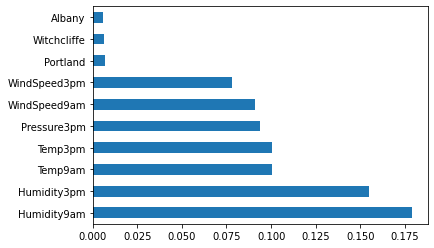

In [ ]:
#ดูว่า feature ไหนมีความสำคัญมากที่สุด
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

feature_imp = pd.Series(etr_model.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')
feature_imp

In [ ]:
#สร้าง Training Data และ Testing Data โดยกำหนด test_size=0.3 และกำหนดrandom_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

KNN

In [ ]:
k = 5

#Create model named 'clf_knn'
clf_knn = KNeighborsClassifier(n_neighbors=k)

#Fit model
clf_knn.fit(X_train, y_train)

#Predict named 'knn_y_pred'
knn_y_pred = clf_knn.predict(X_test)

print(f'Test data accuracy score (K = {k}):{accuracy_score(y_test,knn_y_pred)}')

Test data accuracy score (K = 5):0.8204875761837788


In [ ]:
#ใช้ cross_val_score เพื่อคำนวณ Cross-validation
knn_cv = cross_val_score(clf_knn, X,y,cv=10)

#แสดงค่า Cross-validation ในแต่ละรอบ
for i in range(len(knn_cv)) :
    print('Fold %s : %s' %(i, knn_cv[i]))

#แสดงค่าเฉลี่ยของ Cross-validation
print("Mean cross val score : ",np.mean(knn_cv))

Fold 0 : 0.819620253164557
Fold 1 : 0.6713080168776371
Fold 2 : 0.800492264416315
Fold 3 : 0.7361462728551336
Fold 4 : 0.7781997187060479
Fold 5 : 0.5728551336146273
Fold 6 : 0.690436005625879
Fold 7 : 0.6364978902953586
Fold 8 : 0.7097046413502109
Fold 9 : 0.8130670229973979
Mean cross val score :  0.7228327219903165


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


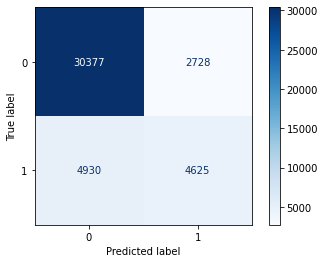

In [ ]:
#วาด Confusion matrix
plot_confusion_matrix(clf_knn, X_test,y_test, cmap='Blues', values_format='d')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


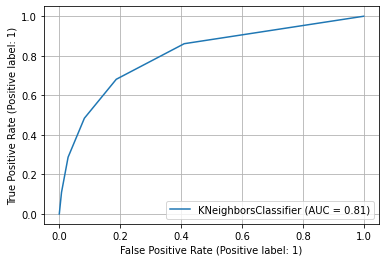

In [ ]:
#AUC ROC curve
plot_roc_curve(clf_knn, X_test, y_test)
plt.grid()

Random Forest

In [ ]:
#random forest(iii)
ASM_function = ['entropy', 'gini']
clf_rf=RandomForestClassifier(criterion=ASM_function[0],n_estimators=50, n_jobs=-1, random_state=10)

#Fit model
clf_rf.fit(X_train,y_train)

#Predict named 'rf_y_pred'
rf_y_pred = clf_rf.predict(X_test)

#Print Test data accuracy score
print(f'Test data accuracy score : {accuracy_score(y_test,rf_y_pred)}')

Test data accuracy score : 0.839732770745429


In [ ]:
#ใช้ cross_val_score เพื่อคำนวณ Cross-Validation
rf_cross_val = cross_val_score(clf_rf, X, y, cv=10, n_jobs=-1)

#เรียกดูค่า Cross-Validation ในแต่ละรอบ
print('Cross val score')
for i in range(len(rf_cross_val)) :
    print(f'Fold {i+1} : {rf_cross_val[i]}')

#แสดงค่าเฉลี่ย Cross-Validation score
print(f'Mean Cross val score : {np.mean(rf_cross_val)}')

Cross val score
Fold 1 : 0.8317158931082982
Fold 2 : 0.6841068917018284
Fold 3 : 0.8213783403656821
Fold 4 : 0.7612517580872011
Fold 5 : 0.80098452883263
Fold 6 : 0.5976090014064698
Fold 7 : 0.6797468354430379
Fold 8 : 0.6514767932489451
Fold 9 : 0.7218706047819972
Fold 10 : 0.8277656656586257
Mean Cross val score : 0.7377906312634714


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


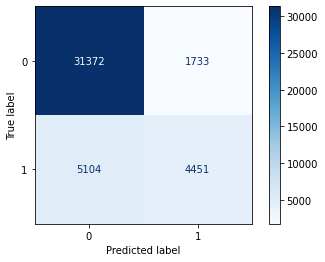

In [ ]:
#วาด Confusion matrix
plot_confusion_matrix(clf_rf, X_test,y_test, cmap='Blues', values_format='d')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


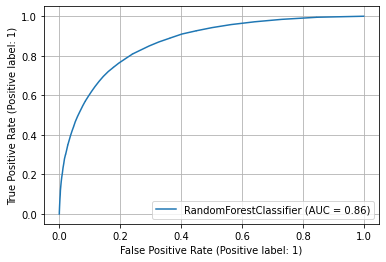

In [ ]:
#AUC ROC curve
plot_roc_curve(clf_rf, X_test, y_test)
plt.grid()